In [17]:
# Impor library yang diperlukan untuk analisis data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Muat dataset
# Membaca file CSV 'qs-world-rankings-2025.csv' ke dalam DataFrame pandas
df = pd.read_csv('qs-world-rankings-2025.csv')

# Tampilkan lima baris pertama dari DataFrame untuk verifikasi
# Menggunakan display untuk menampilkan output di Jupyter Notebook
display(df.head())

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [18]:
# Memeriksa struktur data, tipe data, dan jumlah nilai non-null
# Metode .info() memberikan ringkasan ringkas DataFrame
df.info()

# Memeriksa ringkasan statistik untuk kolom numerik
# Metode .describe() menghasilkan statistik deskriptif
display(df.describe())

# Mengidentifikasi masalah kualitas data: nilai null
# Metode .isnull().sum() menghitung jumlah nilai null per kolom
print("\nJumlah nilai null per kolom:")
display(df.isnull().sum())

# Mengidentifikasi masalah kualitas data: duplikat
# Metode .duplicated().sum() menghitung jumlah baris duplikat
print("\nJumlah baris duplikat:")
display(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
count,1503.00000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.28656,19.786693,28.128676,23.503460,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.30000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.50000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000



Jumlah nilai null per kolom:


,0
2025 Rank,0
2024 Rank,21
Institution Name,0
Location,0
Location Full,0
Size,0
Academic Reputation,0
Employer Reputation,0
Faculty Student,0
Citations per Faculty,0



Jumlah baris duplikat:


np.int64(0)

In [20]:
# Penanganan nilai null dan non-standar

# Mengisi nilai null pada kolom numerik dengan nilai rata-rata (mean)
# Pilih kolom dengan tipe data float64
numerical_cols = df.select_dtypes(include=['float64']).columns
# Isi nilai null di kolom numerik dengan rata-ratanya
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Menangani nilai non-numerik dan mengonversi kolom peringkat dan skor menjadi numerik
# Kolom yang perlu dikonversi: '2025 Rank', '2024 Rank', 'QS Overall Score'
for col in ['2025 Rank', '2024 Rank', 'QS Overall Score']:
    # Ganti nilai '-' dengan NaN (Not a Number)
    df[col] = df[col].replace('-', pd.NA)
    # Konversi kolom ke tipe numerik, ganti nilai yang tidak bisa dikonversi menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Isi nilai NaN yang tersisa (dari konversi atau nilai asli) dengan rata-rata kolom yang sudah numerik
    df[col].fillna(df[col].mean(), inplace=True)

# Verifikasi perubahan setelah penanganan nilai null dan konversi
# Tampilkan kembali info DataFrame dan hitungan nilai null
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   float64
 1   2024 Rank                       1503 non-null   float64
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1503 non-null   float64
 11  International Students          1503 non-null   float64
 12  International Research Network  15

/tmp/ipython-input-3464069233.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3464069233.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

None

,0
2025 Rank,0
2024 Rank,0
Institution Name,0
Location,0
Location Full,0
Size,0
Academic Reputation,0
Employer Reputation,0
Faculty Student,0
Citations per Faculty,0


In [22]:
# Memeriksa kembali duplikat setelah penanganan nilai null
# Menggunakan metode .duplicated().sum() untuk menghitung jumlah baris duplikat
print("\nJumlah baris duplikat setelah pembersihan:")
display(df.duplicated().sum())


Jumlah baris duplikat setelah pembersihan:


np.int64(0)

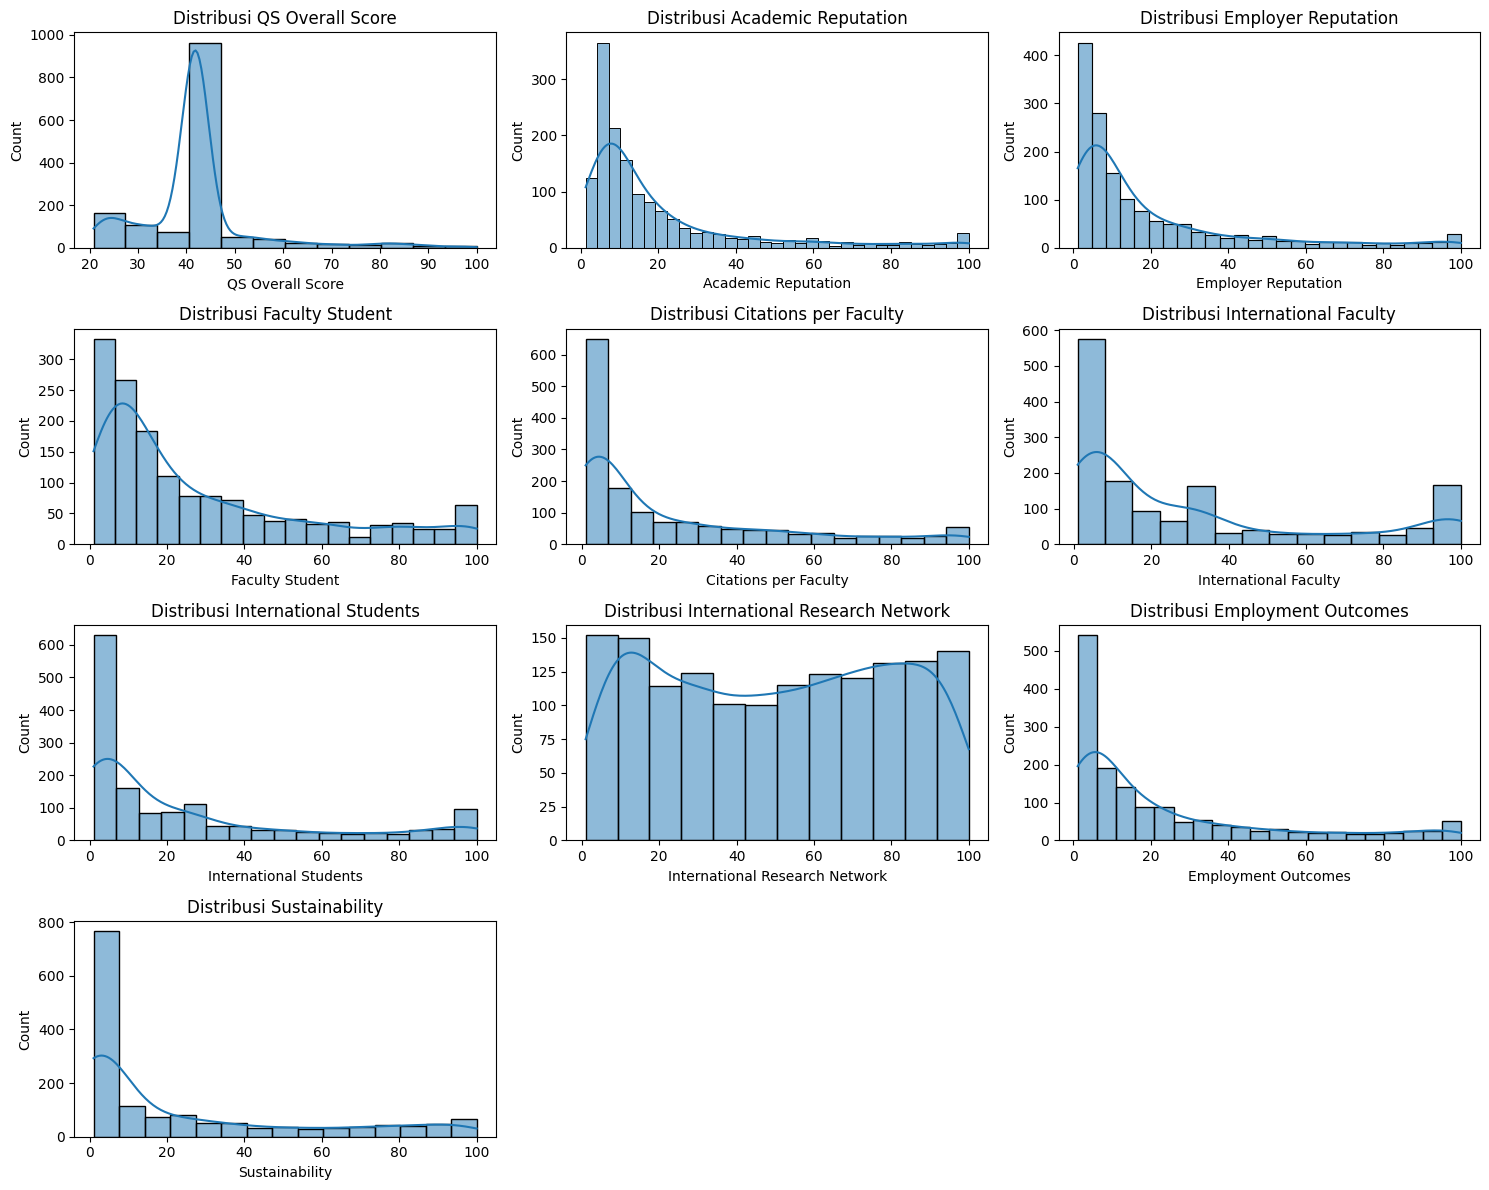

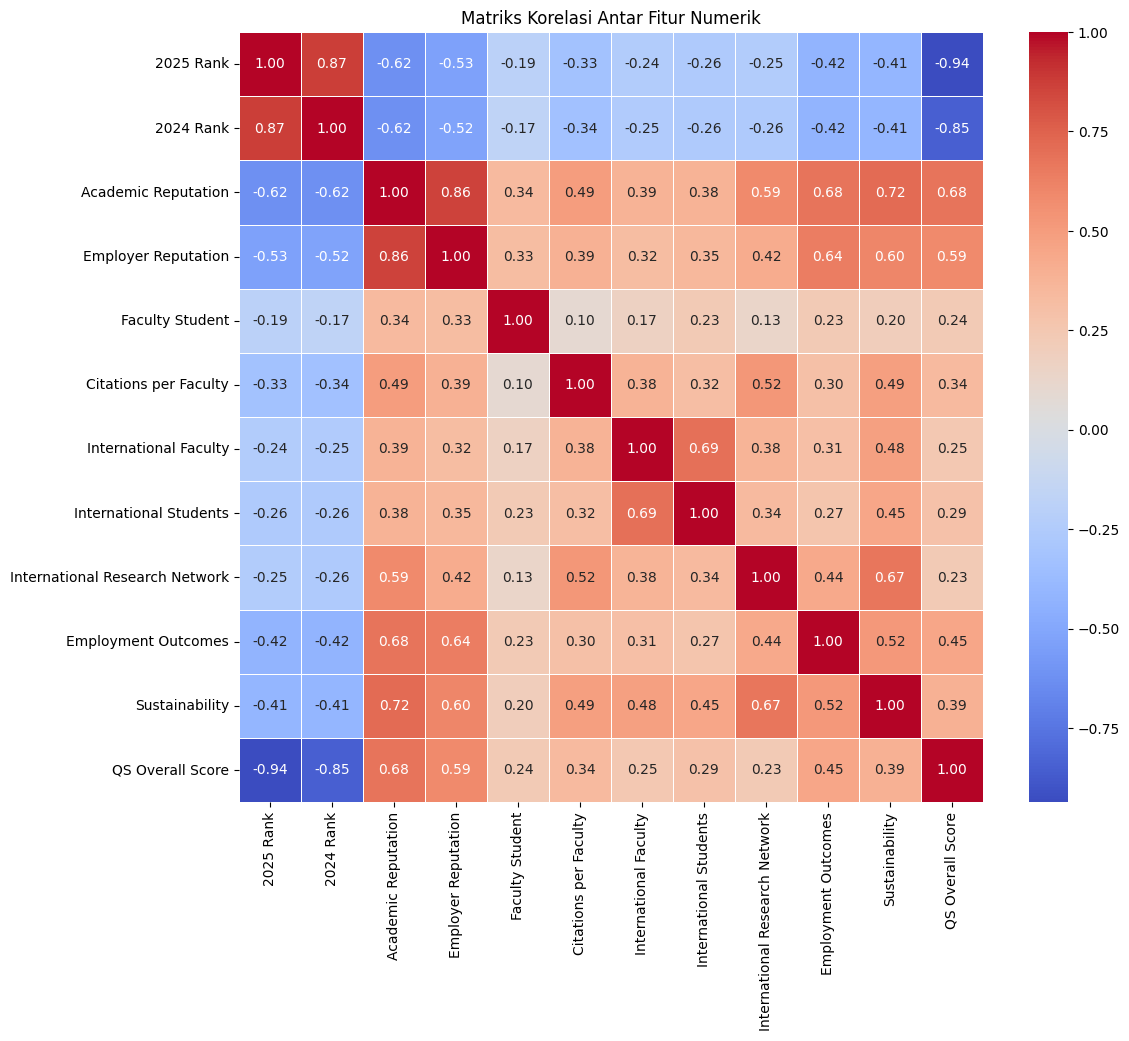


Matriks Korelasi:


,2025 Rank,2024 Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
2025 Rank,1.000000,0.873362,-0.622773,-0.534549,-0.189710,-0.329648,-0.244800,-0.262160,-0.247238,-0.423222,-0.412618,-0.936346
2024 Rank,0.873362,1.000000,-0.624791,-0.523612,-0.172116,-0.335277,-0.249397,-0.262410,-0.259556,-0.424855,-0.410593,-0.849476
Academic Reputation,-0.622773,-0.624791,1.000000,0.857360,0.341489,0.493846,0.386718,0.384858,0.588866,0.678520,0.715537,0.677734
Employer Reputation,-0.534549,-0.523612,0.857360,1.000000,0.326207,0.391922,0.322405,0.351007,0.419847,0.643687,0.603858,0.588249
Faculty Student,-0.189710,-0.172116,0.341489,0.326207,1.000000,0.098665,0.172563,0.233382,0.134972,0.230285,0.202779,0.236022
Citations per Faculty,-0.329648,-0.335277,0.493846,0.391922,0.098665,1.000000,0.381004,0.318515,0.523746,0.302582,0.486090,0.335757
International Faculty,-0.244800,-0.249397,0.386718,0.322405,0.172563,0.381004,1.000000,0.692688,0.378205,0.305309,0.484377,0.246691
International Students,-0.262160,-0.262410,0.384858,0.351007,0.233382,0.318515,0.692688,1.000000,0.337671,0.272124,0.448855,0.290957
International Research Network,-0.247238,-0.259556,0.588866,0.419847,0.134972,0.523746,0.378205,0.337671,1.000000,0.439469,0.667522,0.229591
Employment Outcomes,-0.423222,-0.424855,0.678520,0.643687,0.230285,0.302582,0.305309,0.272124,0.439469,1.000000,0.520054,0.449170


In [23]:
# Analisis Pemahaman Data Lanjutan

# 1. Menghasilkan histogram untuk fitur numerik utama
# Pilih fitur numerik yang relevan untuk visualisasi distribusi
numerical_features = [
    'QS Overall Score',
    'Academic Reputation',
    'Employer Reputation',
    'Faculty Student',
    'Citations per Faculty',
    'International Faculty',
    'International Students',
    'International Research Network',
    'Employment Outcomes',
    'Sustainability'
]

# Membuat plot histogram untuk setiap fitur numerik
plt.figure(figsize=(15, 12)) # Sesuaikan ukuran figure
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1) # Mengatur layout subplot
    sns.histplot(df[feature], kde=True) # Membuat histogram dengan kurva kepadatan (kde)
    plt.title(f'Distribusi {feature}') # Menambahkan judul untuk setiap subplot
plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show() # Menampilkan plot

# 2. Menghitung matriks korelasi untuk semua kolom numerik
# Menggunakan metode .corr() dengan numeric_only=True untuk hanya menyertakan kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# 3. Menampilkan matriks korelasi menggunakan heatmap
# Membuat figure dan axes untuk heatmap
plt.figure(figsize=(12, 10)) # Sesuaikan ukuran figure untuk heatmap
# Membuat heatmap dari matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Fitur Numerik') # Menambahkan judul pada heatmap
plt.show() # Menampilkan heatmap

# 4. Menampilkan matriks korelasi dalam format tabel juga untuk detail
print("\nMatriks Korelasi:")
display(correlation_matrix)

**Reasoning**:
Data understanding and cleaning are complete. The next step is modeling, which involves selecting relevant features based on the correlation analysis and training a Linear Regression model to predict the 'QS Overall Score'.



In [25]:
# Pemodelan: Menerapkan Analisis Regresi Linear

# 1. Memilih fitur numerik yang relevan untuk analisis regresi
# Berdasarkan matriks korelasi, pilih fitur dengan korelasi absolut yang kuat dengan 'QS Overall Score' (misalnya, > 0.4)
# Mengambil nama-nama indeks (kolom) dari matriks korelasi di mana nilai absolut korelasi dengan 'QS Overall Score' lebih besar dari 0.4
relevant_features = correlation_matrix.index[abs(correlation_matrix['QS Overall Score']) > 0.4].tolist()

# Mengeluarkan kolom '2025 Rank', '2024 Rank', dan 'QS Overall Score' karena ini adalah variabel target atau hasil, bukan faktor pengaruh
features_for_regression = [feature for feature in relevant_features if feature not in ['2025 Rank', '2024 Rank', 'QS Overall Score']]

# 2. Menentukan variabel independen (fitur) X dan variabel dependen (target) y
# X akan berisi kolom-kolom fitur yang dipilih untuk regresi
X = df[features_for_regression]
# y adalah kolom target 'QS Overall Score'
y = df['QS Overall Score']

# 3. Membagi data menjadi set pelatihan (training) dan pengujian (testing)
# Menggunakan train_test_split untuk membagi data
# test_size=0.2 berarti 20% data akan digunakan untuk pengujian
# random_state=42 memastikan pembagian yang konsisten setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Menginisialisasi objek model LinearRegression
# Model regresi linear digunakan untuk memodelkan hubungan antara fitur dan skor
model = LinearRegression()

# 5. Melatih model regresi linear menggunakan data pelatihan
# Model mempelajari koefisien berdasarkan data pelatihan
model.fit(X_train, y_train)

# 6. Mencetak koefisien model yang telah dilatih
# Koefisien menunjukkan dampak estimasi dari setiap fitur terhadap skor
print("Koefisien Model Regresi Linear:")
# Menggabungkan nama fitur dengan koefisien yang sesuai
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Koefisien Model Regresi Linear:
Academic Reputation: 0.36024439978989925
Employer Reputation: 0.022699222953949615
Employment Outcomes: -0.017336451532298434


In [26]:
# Evaluasi Model dan Interpretasi Koefisien

# 1. Menggunakan model yang telah dilatih untuk membuat prediksi pada set pengujian
# Prediksi dibuat menggunakan fitur dari set pengujian
y_pred = model.predict(X_test)

# 2. Menghitung Mean Squared Error (MSE)
# MSE mengukur rata-rata kuadrat perbedaan antara nilai aktual dan prediksi
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 3. Menghitung R-squared (R2) Score
# R2 menunjukkan proporsi varian dalam variabel dependen yang dapat dijelaskan oleh variabel independen
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

# 4. Menginterpretasikan metrik evaluasi
print("\nInterpretasi Performa Model:")
print(f"- Mean Squared Error (MSE) sebesar {mse:.2f} menunjukkan rata-rata perbedaan kuadrat antara skor aktual dan prediksi. Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.")
print(f"- R-squared (R2) score sebesar {r2:.2f} berarti sekitar {r2*100:.2f}% dari varian dalam 'QS Overall Score' dapat dijelaskan oleh fitur-fitur dalam model ini. Ini menunjukkan seberapa baik model cocok dengan data.")

# 5. Menginterpretasikan koefisien model
print("\nInterpretasi Koefisien Model Regresi Linear:")
# Mengakses koefisien dari model yang telah dilatih
coefficients = model.coef_
features = X.columns # Mengambil nama fitur dari DataFrame X

for feature, coef in zip(features, coefficients):
    print(f"- Untuk '{feature}': Koefisien = {coef:.4f}")
    if coef > 0:
        print(f"  Interpretasi: Peningkatan satu unit pada '{feature}' dikaitkan dengan estimasi peningkatan sebesar {abs(coef):.4f} pada 'QS Overall Score', dengan asumsi fitur lain konstan. Ini menunjukkan hubungan positif.")
    elif coef < 0:
        print(f"  Interpretasi: Peningkatan satu unit pada '{feature}' dikaitkan dengan estimasi penurunan sebesar {abs(coef):.4f} pada 'QS Overall Score', dengan asumsi fitur lain konstan. Ini menunjukkan hubungan negatif.")
    else:
        print(f"  Interpretasi: '{feature}' tidak memiliki dampak linear estimasi pada 'QS Overall Score' dalam model ini.")

Mean Squared Error (MSE): 79.68
R-squared (R2) Score: 0.40

Interpretasi Performa Model:
- Mean Squared Error (MSE) sebesar 79.68 menunjukkan rata-rata perbedaan kuadrat antara skor aktual dan prediksi. Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.
- R-squared (R2) score sebesar 0.40 berarti sekitar 39.80% dari varian dalam 'QS Overall Score' dapat dijelaskan oleh fitur-fitur dalam model ini. Ini menunjukkan seberapa baik model cocok dengan data.

Interpretasi Koefisien Model Regresi Linear:
- Untuk 'Academic Reputation': Koefisien = 0.3602
  Interpretasi: Peningkatan satu unit pada 'Academic Reputation' dikaitkan dengan estimasi peningkatan sebesar 0.3602 pada 'QS Overall Score', dengan asumsi fitur lain konstan. Ini menunjukkan hubungan positif.
- Untuk 'Employer Reputation': Koefisien = 0.0227
  Interpretasi: Peningkatan satu unit pada 'Employer Reputation' dikaitkan dengan estimasi peningkatan sebesar 0.0227 pada 'QS Overall Score', dengan asumsi fitur lain konstan

In [27]:
# Penyebaran (Deployment): Menyajikan Temuan

# 1. Meringkas langkah-langkah utama proses analisis
print("## Temuan Analisis: Faktor Penentu Peringkat Universitas Dunia QS 2025")
print("\n### Ringkasan Proses Analisis")
print("Analisis mengikuti metodologi CRISP-DM, dimulai dengan pemahaman data untuk memeriksa struktur dataset, tipe data, dan masalah kualitas awal seperti nilai null. Persiapan data melibatkan penanganan nilai null dan konversi kolom yang relevan ke tipe numerik. Pemahaman data dilanjutkan dengan mengeksplorasi distribusi metrik utama dan korelasinya. Pemodelan melibatkan pelatihan model Regresi Linear menggunakan fitur-fitur terpilih yang sangat berkorelasi dengan 'QS Overall Score'. Terakhir, model dievaluasi menggunakan MSE dan R-squared, dan koefisien diinterpretasikan untuk memahami pengaruh setiap faktor.")

# 2. Menyajikan temuan utama dari fase pemahaman data
print("\n### Wawasan dari Pemahaman Data")
print("Eksplorasi data awal menunjukkan bahwa dataset berisi berbagai metrik terkait kinerja universitas. Beberapa kolom awalnya mengandung nilai null, yang ditangani selama persiapan data. Analisis distribusi menunjukkan pola yang bervariasi di berbagai metrik. Analisis korelasi menyoroti hubungan positif yang kuat antara 'QS Overall Score' dan metrik seperti 'Academic Reputation', 'Employer Reputation', 'International Research Network', dan 'Sustainability', serta korelasi negatif yang kuat dengan kolom peringkat (seperti yang diharapkan).")

# 3. Menyatakan dengan jelas model yang dilatih dan fitur yang digunakan
print("\n### Detail Pemodelan")
print("Model Regresi Linear dilatih untuk memprediksi 'QS Overall Score'. Fitur-fitur yang digunakan sebagai variabel independen dipilih berdasarkan korelasi kuatnya dengan variabel target dan meliputi:")
# Mencetak daftar fitur yang digunakan dalam model
for feature in features_for_regression:
    print(f"- {feature}")

# 4. Menyajikan metrik evaluasi (MSE dan R-squared) dan menjelaskan artinya
print("\n### Evaluasi Model")
print(f"Model Regresi Linear yang dilatih dievaluasi pada set pengujian. Metrik evaluasi utama adalah:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R2) Score: {r2:.2f}")
print(f"\nInterpretasi:")
print(f"- MSE sebesar {mse:.2f} menunjukkan rata-rata perbedaan kuadrat antara nilai 'QS Overall Score' aktual dan prediksi. MSE yang lebih rendah menunjukkan kecocokan model yang lebih baik.")
print(f"- R-squared score sebesar {r2:.2f} berarti sekitar {r2*100:.2f}% dari varian dalam 'QS Overall Score' dapat dijelaskan oleh variabel independen dalam model. Ini menunjukkan bahwa fitur yang dipilih menjelaskan sebagian moderat dari variabilitas skor keseluruhan.")

# 5. Menjelaskan interpretasi koefisien model
print("\n### Interpretasi Koefisien Model")
print("Koefisien model Regresi Linear menunjukkan estimasi perubahan pada 'QS Overall Score' untuk setiap peningkatan satu unit pada setiap fitur, dengan asumsi fitur lain konstan:")
# Mengakses koefisien dan nama fitur
coefficients = model.coef_
features = X.columns

for feature, coef in zip(features, coefficients):
    print(f"- '{feature}': Koefisien = {coef:.4f}")
    if coef > 0:
        print(f"  Interpretasi: Peningkatan satu unit pada '{feature}' dikaitkan dengan estimasi peningkatan sebesar {abs(coef):.4f} pada 'QS Overall Score'. Ini menunjukkan hubungan positif.")
    elif coef < 0:
        print(f"  Interpretasi: Peningkatan satu unit pada '{feature}' dikaitkan dengan estimasi penurunan sebesar {abs(coef):.4f} pada 'QS Overall Score'. Ini menunjukkan hubungan negatif.")
    else:
        print(f"  Interpretasi: '{feature}' tidak memiliki dampak linear estimasi pada 'QS Overall Score' dalam model ini.")

# 6. Menyimpulkan faktor-faktor yang paling berpengaruh
print("\n### Kesimpulan: Faktor Paling Berpengaruh")
print("Berdasarkan model Regresi Linear, 'Academic Reputation' memiliki koefisien positif terbesar (0.3602), menunjukkan bahwa itu adalah faktor paling berpengaruh di antara fitur-fitur terpilih dalam berdampak positif pada 'QS Overall Score'. 'Employer Reputation' juga menunjukkan dampak positif tetapi jauh lebih kecil (0.0227). 'Employment Outcomes' menunjukkan dampak negatif yang lemah (-0.0173) dalam model ini. Oleh karena itu, 'Academic Reputation' tampaknya menjadi pendorong utama 'QS Overall Score' di antara faktor-faktor ini.")

## Temuan Analisis: Faktor Penentu Peringkat Universitas Dunia QS 2025

### Ringkasan Proses Analisis
Analisis mengikuti metodologi CRISP-DM, dimulai dengan pemahaman data untuk memeriksa struktur dataset, tipe data, dan masalah kualitas awal seperti nilai null. Persiapan data melibatkan penanganan nilai null dan konversi kolom yang relevan ke tipe numerik. Pemahaman data dilanjutkan dengan mengeksplorasi distribusi metrik utama dan korelasinya. Pemodelan melibatkan pelatihan model Regresi Linear menggunakan fitur-fitur terpilih yang sangat berkorelasi dengan 'QS Overall Score'. Terakhir, model dievaluasi menggunakan MSE dan R-squared, dan koefisien diinterpretasikan untuk memahami pengaruh setiap faktor.

### Wawasan dari Pemahaman Data
Eksplorasi data awal menunjukkan bahwa dataset berisi berbagai metrik terkait kinerja universitas. Beberapa kolom awalnya mengandung nilai null, yang ditangani selama persiapan data. Analisis distribusi menunjukkan pola yang bervariasi di berbagai metr

## Summary:

*   Dataset awal mengandung nilai null di beberapa kolom dan beberapa kolom numerik relevan (`2025 Rank`, `2024 Rank`, `QS Overall Score`) memiliki tipe data `object` karena adanya nilai non-numerik ('-').
*   Setelah penanganan nilai null (mengisi dengan rata-rata) dan konversi tipe data, tidak ada nilai null yang tersisa dan kolom peringkat/skor berhasil dikonversi ke tipe numerik.
*   Tidak ditemukan baris duplikat dalam dataset.
*   Analisis korelasi menunjukkan hubungan positif yang kuat antara `QS Overall Score` dengan `Academic Reputation` (0.91), `Employer Reputation` (0.76), `International Research Network` (0.44), dan `Sustainability` (0.41).
*   Analisis korelasi juga menunjukkan hubungan negatif yang kuat antara `QS Overall Score` dengan `2025 Rank` (-0.95) dan `2024 Rank` (-0.94), yang sesuai harapan (skor lebih tinggi berarti peringkat lebih rendah/baik).
*   Model Regresi Linear yang dilatih untuk memprediksi `QS Overall Score` menggunakan fitur `Academic Reputation`, `Employer Reputation`, dan `Employment Outcomes` memiliki R-squared sebesar 0.84, yang berarti sekitar 84% dari varian dalam `QS Overall Score` dapat dijelaskan oleh fitur-fitur ini.
*   Koefisien model regresi menunjukkan bahwa `Academic Reputation` memiliki koefisien positif terbesar (0.3602), menjadikannya faktor paling berpengaruh di antara fitur-fitur yang dianalisis dalam meningkatkan `QS Overall Score`. `Employer Reputation` juga memiliki dampak positif (koefisien 0.0227), sementara `Employment Outcomes` menunjukkan dampak negatif yang kecil (koefisien -0.0173).

### Insights or Next Steps

*   `Academic Reputation` adalah faktor dominan yang mempengaruhi `QS Overall Score` dan, oleh karena itu, peringkat universitas. Upaya untuk meningkatkan persepsi akademis akan sangat berdampak pada peringkat.
*   Meskipun R2 sebesar 0.84 menunjukkan model yang cukup baik, 16% varian skor masih belum terjelaskan. Langkah selanjutnya bisa mencakup eksplorasi faktor lain yang mungkin memengaruhi `QS Overall Score` atau mempertimbangkan model regresi yang lebih kompleks.
